In [1]:
VERSION = 31
CLOUD_SINGLE = True
DATA_SMALL = False
FOCAL_LOSS = 0
WEIGHTED = False

In [2]:
%run ./Code.ipynb

In [3]:
if 'train_md' not in globals() or 'test_md' not in globals():
    train_md, test_md = loadMetadata()

In [ ]:
# PLAN
# validate that all tta are different for all
# elimination
# update README

# OOF

In [5]:
stg = time.time()
#for ds in [13]:
for ds in (my_datasets3 + my_datasets5):
    folds = getNFolds(ds)
    for fold in range(folds):
        #pp = pickle.load(open(PATH_DISK/'ensemble/oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'rb'))
        predictions = oof_one(num_iter=32, bs=32, fold=fold, dataset=ds)
        #predictions = np.concatenate([pp,predictions],axis=0)
        pickle.dump(predictions, open(PATH_DISK/'ensemble/oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'wb'))
        print('total time', time.time() - stg)

completed epochs: 13 iters starting now: 8
adding dummy serieses 25
DataSet 13 valid size 3936 fold 0
dataset valid: 3936 loader valid: 123
loading model model.b13.f0.d13.v31
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.049 time per batch: 0.101
Batch 100 device: cuda time passed: 9.179 time per batch: 0.092
ver 31, iter 0, fold 0, val ll: 0.0598, cor: 0.8456, auc: 0.9892
setFeats, augmentation -1
Batch 50 device: cuda time passed: 4.921 time per batch: 0.098
Batch 100 device: cuda time passed: 9.019 time per batch: 0.090
ver 31, iter 1, fold 0, val ll: 0.0599, cor: 0.8460, auc: 0.9892
setFeats, augmentation -1
Batch 50 device: cuda time passed: 4.911 time per batch: 0.098
Batch 100 device: cuda time passed: 9.090 time per batch: 0.091
ver 31, iter 2, fold 0, val ll: 0.0596, cor: 0.8462, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 4.781 time per batch: 0.096
Batch 100 device: cuda time passed: 8.977 time per batch: 0.090
ver 31, iter 3, fo

Batch 100 device: cuda time passed: 9.142 time per batch: 0.091
ver 31, iter 0, fold 4, val ll: 0.0617, cor: 0.8424, auc: 0.9884
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.011 time per batch: 0.100
Batch 100 device: cuda time passed: 9.221 time per batch: 0.092
ver 31, iter 1, fold 4, val ll: 0.0617, cor: 0.8426, auc: 0.9884
setFeats, augmentation -1
Batch 50 device: cuda time passed: 4.911 time per batch: 0.098
Batch 100 device: cuda time passed: 9.132 time per batch: 0.091
ver 31, iter 2, fold 4, val ll: 0.0617, cor: 0.8430, auc: 0.9883
setFeats, augmentation -1
Batch 50 device: cuda time passed: 4.872 time per batch: 0.097
Batch 100 device: cuda time passed: 8.979 time per batch: 0.090
ver 31, iter 3, fold 4, val ll: 0.0617, cor: 0.8425, auc: 0.9884
setFeats, augmentation -1
Batch 50 device: cuda time passed: 4.758 time per batch: 0.095
Batch 100 device: cuda time passed: 9.103 time per batch: 0.091
ver 31, iter 4, fold 4, val ll: 0.0618, cor: 0.8423, auc: 0.9885

In [ ]:
#range(6,13) x8
#5113.189187049866

In [12]:
#total running time 1201.68962931633
#total time 15020.348212480545

4.231111111111111

In [6]:
preds_all = getPredsOOF(aug=32,datasets=my_datasets3,datasets5=my_datasets5,ver=VERSION)

In [7]:
# weighted 
# [0.15059251, 0.00462303, 0.05034504, 0.03602126, 0.04910235, 0.06661193]

# non-weighted
# [0.14268919, 0.00409448, 0.04815497, 0.03553187, 0.04749233, 0.06196157]

preds_all.mean((0,1,2))

array([0.14268919, 0.00409448, 0.04815497, 0.03553187, 0.04749233,
       0.06196157])

In [8]:
names_y = [
    #'model_Densenet201_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    #'model_Densenet161_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_Densenet169_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnext101_32x4d_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl'
]

In [9]:
names_y5 = [
    'model_se_resnext101_32x4d_version_new_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_new_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_new_splits_focal_fullhead_resmodel_pool2_over3_type_OOF_pred_split_{}.pkl',
]

In [10]:
preds_y = getYuvalOOF(train_md=train_md, names=names_y, names5=names_y5)

adding yuval_idx
adding yuval_idx


In [11]:
preds_y.mean((0,1))

array([0.14303509, 0.00386332, 0.04755156, 0.03477805, 0.04727167,
       0.06297307])

In [12]:
preds_all = np.concatenate([preds_all.mean(1), preds_y], axis=0)

In [13]:
del preds_y

In [14]:
preds_all.shape

(13, 674252, 6)

## Elimination

In [22]:
def getMaskedLoss(preds_all, mask, weighted):
    
    loss = ((- train_md[all_ich].values * np.log(preds_all[mask].mean(0)) \
            - (1 - train_md[all_ich].values) * np.log(1 - preds_all[mask].mean(0)))*class_weights)
    
    if weighted:
        loss = (loss * np.expand_dims(train_md['weights'].values,axis=1)).mean()
    else:
        loss = loss.mean()
    return loss

def produceDSMask(weighted):
    
    N = len(preds_all)
    ds_mask = np.ones(N, dtype=bool)
    best_loss = getMaskedLoss(preds_all, ds_mask, weighted)

    for i in range(N):
        worst_k = -1
        worst_loss = best_loss
        print('starting iter',i,'loss',best_loss,'eliminated',(~ds_mask).sum())
        for k in range(N):
            mask2 = ds_mask.copy()
            mask2[k] = False
            loss = getMaskedLoss(preds_all, mask2, weighted)
            if loss < worst_loss:
                worst_loss = loss
                worst_k = k
        if worst_k >= 0:
            print('eliminating',worst_k,'new loss',worst_loss)
            ds_mask[worst_k] = False
            best_loss = worst_loss
        else:
            break
    
    print('removed', np.where(~ds_mask)[0])
    
    return ds_mask

In [23]:
ds_mask1 = produceDSMask(False)
print('')
ds_mask2 = produceDSMask(True)

starting iter 0 loss 0.05771326427865661 eliminated 0
eliminating 2 new loss 0.05768188239887831
starting iter 1 loss 0.05768188239887831 eliminated 1
eliminating 1 new loss 0.057661878553837774
starting iter 2 loss 0.057661878553837774 eliminated 2
eliminating 6 new loss 0.05763965049891351
starting iter 3 loss 0.05763965049891351 eliminated 3
removed [1 2 6]

starting iter 0 loss 0.06285424752701063 eliminated 0
eliminating 9 new loss 0.06279914654317935
starting iter 1 loss 0.06279914654317935 eliminated 1
eliminating 6 new loss 0.06274753157727826
starting iter 2 loss 0.06274753157727826 eliminated 2
eliminating 8 new loss 0.06270638915181637
starting iter 3 loss 0.06270638915181637 eliminated 3
eliminating 2 new loss 0.06266939179219866
starting iter 4 loss 0.06266939179219866 eliminated 4
eliminating 5 new loss 0.06266324947626697
starting iter 5 loss 0.06266324947626697 eliminated 5
eliminating 7 new loss 0.06265537682138392
starting iter 6 loss 0.06265537682138392 eliminated 6


In [26]:
ds_mask = ds_mask1 | ds_mask2

In [28]:
preds_all = preds_all[ds_mask]
my_len = ds_mask[:my_len].sum()

## OOF analysis

In [30]:
np.set_printoptions(precision=3)

loss = (- train_md[all_ich].values * np.log(preds_all) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all)).mean(1)
for k in range(6):
    print('{:20s} {}'.format(all_ich[k],loss[:,k]))

any                  [0.1   0.098 0.097 0.096 0.096 0.1   0.099 0.098 0.097 0.096 0.096]
epidural             [0.017 0.016 0.015 0.016 0.016 0.017 0.015 0.015 0.015 0.015 0.015]
intraparenchymal     [0.042 0.042 0.041 0.042 0.042 0.042 0.042 0.042 0.041 0.041 0.041]
intraventricular     [0.025 0.026 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.024 0.025]
subarachnoid         [0.066 0.066 0.065 0.065 0.065 0.066 0.065 0.065 0.064 0.064 0.064]
subdural             [0.082 0.081 0.08  0.079 0.08  0.081 0.08  0.08  0.079 0.079 0.079]


In [31]:
print(preds_all.mean(1).transpose())

[[0.143 0.144 0.142 0.142 0.142 0.143 0.14  0.144 0.145 0.144 0.143]
 [0.003 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004]
 [0.048 0.049 0.048 0.048 0.048 0.048 0.046 0.047 0.047 0.048 0.048]
 [0.036 0.036 0.035 0.035 0.035 0.035 0.034 0.035 0.034 0.035 0.035]
 [0.047 0.048 0.047 0.047 0.047 0.047 0.046 0.048 0.048 0.047 0.047]
 [0.062 0.063 0.062 0.062 0.061 0.062 0.062 0.063 0.064 0.063 0.063]]


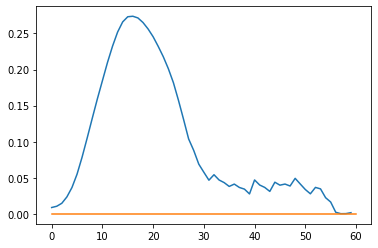

In [32]:
zz = preds_all.mean(0)[:,0]

train_md['prob'] = zz

plt.plot(train_md[['prob','pos_idx']].groupby('pos_idx').mean())
plt.plot([0,60],[0,0])

In [24]:
log_loss(train_md['any'],train_md['prob'])

0.0936716268706097

(0, 5)

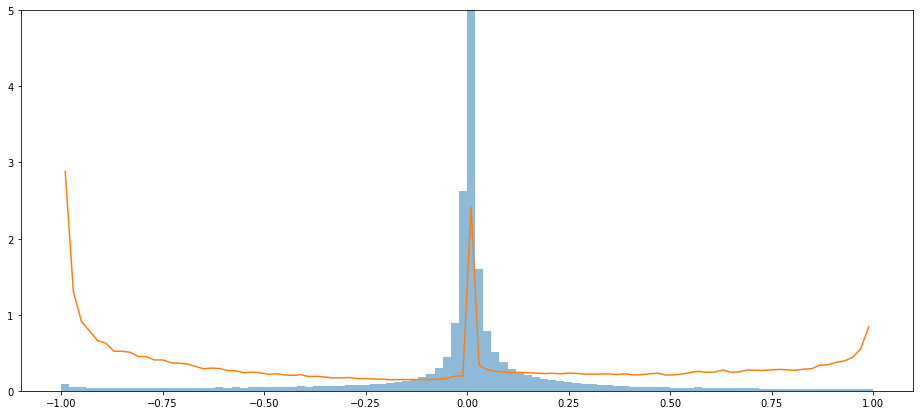

In [33]:
#zz = preds_all.mean(1)[0,:,0]
k=0
zz = preds_all.mean(0)[:,k]
#zz = preds_all[0,0,:,k]
#zz = scalePreds(zz,power=1.3)


plt.figure(figsize=(16, 7))
a = plt.hist(zz - train_md[all_ich[k]],bins=100,alpha=0.5,density=True)
b = 0.5*(a[1][1:] + a[1][:-1])
plt.plot(b,-7*np.log(1-abs(b))*a[0])
plt.ylim([0,5])

In [34]:
np.set_printoptions(precision=2)
zz = preds_all.mean(0)
for k in range(6):
    print(k,np.quantile(zz[:,k],[0.0001,0.001,0.01,0.5,0.99,0.999,0.9999]))

0 [5.78e-05 7.56e-05 1.04e-04 1.56e-03 9.96e-01 9.99e-01 9.99e-01]
1 [9.80e-06 1.26e-05 1.73e-05 1.06e-04 7.88e-02 4.59e-01 8.40e-01]
2 [2.18e-05 2.77e-05 3.75e-05 2.65e-04 9.83e-01 9.95e-01 9.97e-01]
3 [1.09e-05 1.40e-05 1.87e-05 9.84e-05 9.79e-01 9.93e-01 9.96e-01]
4 [3.04e-05 4.17e-05 5.60e-05 4.04e-04 9.57e-01 9.93e-01 9.96e-01]
5 [3.61e-05 4.85e-05 6.83e-05 8.42e-04 9.65e-01 9.91e-01 9.95e-01]


## Bounding

In [35]:
preds_all.shape

(11, 674252, 6)

In [36]:
loss = ((- train_md[all_ich].values * np.log(preds_all.mean(0)) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all.mean(0)))*class_weights).mean()
print(loss)

0.057668576086352084


In [37]:
preds_all = predBounding(preds_all, target=train_md[all_ich].values)

initial score 0.057668576086352084
any too low inconsistencies
1 class: 0.003873922509684806
2 class: 0.023761954661677614
3 class: 0.013258193726327302
4 class: 0.028887769504037604
5 class: 0.08836957641410575
total 0.13687086511490443
any too low corrected score 0.057651323429120306
any too high inconsistencies
total 0.24568572419375975
any too high corrected score 0.05764758096800167


In [38]:
loss = ((- train_md[all_ich].values * np.log(preds_all.mean(0)) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all.mean(0)))*class_weights).mean()
print(loss)

0.05764758096800167


## Models behavior per groups

In [39]:
np.set_printoptions(precision=4)
for col in ['PxlMin_zero']:
    for i in train_md[col].unique():
        res = ((- train_md[all_ich].values * np.log(preds_all) - (1 - train_md[all_ich].values) \
                * np.log(1 - preds_all)) * class_weights)[:,(train_md[col] == i)].mean((1,2))
        sz = (train_md[col] == i).sum()
        sz_test = (test_md[col] == i).sum()
        print('{:2d}: {:6d} {:6d} {}'.format(i,sz,sz_test,res))

 0: 447063   5033 [0.0746 0.0738 0.0725 0.0723 0.0725 0.0742 0.0731 0.073  0.072  0.0717
 0.0717]
 1: 227189  73512 [0.0366 0.0361 0.0353 0.035  0.0353 0.037  0.0361 0.0362 0.0354 0.035
 0.035 ]


# Inference

In [ ]:
stg = time.time()

for ds in (my_datasets3 + my_datasets5[:-1]):
#for ds in [13]:
    folds = getNFolds(ds)
    preds = []
    for fold in range(folds):
        preds2 = []
        for anum in range(32):
            predictions = inference_one(fold = fold, anum = anum, bs=bs, dataset=ds)
            preds2.append(predictions)
        preds.append(np.stack(preds2))
    preds = np.stack(preds)
    print('total time', time.time() - stg)
    
    pickle.dump(preds, open(PATH_DISK/'preds_d{}_v{}'.format(ds, VERSION),'wb'))

completed epochs: 13
loading model model.b13.f0.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.121 time per batch: 0.112
B20 -> time passed: 1.690 time per batch: 0.085
B30 -> time passed: 2.234 time per batch: 0.074
B40 -> time passed: 2.852 time per batch: 0.071
B50 -> time passed: 3.819 time per batch: 0.076
B60 -> time passed: 4.325 time per batch: 0.072
B70 -> time passed: 4.639 time per batch: 0.066
test processing time: 24.122931003570557
completed epochs: 13
loading model model.b13.f0.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.035 time per batch: 0.103
B20 -> time passed: 1.581 time per batch: 0.079
B30 -> time passed: 2.132 time per batch: 0.071
B40 -> time passed: 2.681 time per batch: 0.067
B50 -> time passed: 3.481 time per batch: 0.070
B60 -> time passed: 4.136 time per ba

adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.063 time per batch: 0.106
B20 -> time passed: 1.608 time per batch: 0.080
B30 -> time passed: 2.152 time per batch: 0.072
B40 -> time passed: 2.734 time per batch: 0.068
B50 -> time passed: 3.599 time per batch: 0.072
B60 -> time passed: 4.186 time per batch: 0.070
B70 -> time passed: 4.619 time per batch: 0.066
test processing time: 11.030303716659546
completed epochs: 13
loading model model.b13.f0.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.099 time per batch: 0.110
B20 -> time passed: 1.674 time per batch: 0.084
B30 -> time passed: 2.249 time per batch: 0.075
B40 -> time passed: 2.753 time per batch: 0.069
B50 -> time passed: 3.655 time per batch: 0.073
B60 -> time passed: 4.215 time per batch: 0.070
B70 -> time passed: 4.573 time per batch: 0.

adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.079 time per batch: 0.108
B20 -> time passed: 1.650 time per batch: 0.083
B30 -> time passed: 2.204 time per batch: 0.073
B40 -> time passed: 2.827 time per batch: 0.071
B50 -> time passed: 3.683 time per batch: 0.074
B60 -> time passed: 4.300 time per batch: 0.072
B70 -> time passed: 4.639 time per batch: 0.066
test processing time: 11.067747116088867
completed epochs: 13
loading model model.b13.f0.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.100 time per batch: 0.110
B20 -> time passed: 1.696 time per batch: 0.085
B30 -> time passed: 2.276 time per batch: 0.076
B40 -> time passed: 2.869 time per batch: 0.072
B50 -> time passed: 3.855 time per batch: 0.077
B60 -> time passed: 4.373 time per batch: 0.073
B70 -> time passed: 4.701 time per batch: 0.

adding dummy serieses 26
DataSet 7 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.098 time per batch: 0.110
B20 -> time passed: 1.666 time per batch: 0.083
B30 -> time passed: 2.253 time per batch: 0.075
B40 -> time passed: 2.855 time per batch: 0.071
B50 -> time passed: 3.844 time per batch: 0.077
B60 -> time passed: 4.375 time per batch: 0.073
B70 -> time passed: 4.725 time per batch: 0.067
test processing time: 11.218811511993408
completed epochs: 13
loading model model.b13.f1.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.101 time per batch: 0.110
B20 -> time passed: 1.669 time per batch: 0.083
B30 -> time passed: 2.195 time per batch: 0.073
B40 -> time passed: 2.806 time per batch: 0.070
B50 -> time passed: 3.794 time per batch: 0.076
B60 -> time passed: 4.318 time per batch: 0.072
B70 -> time passed: 4.642 time per batch: 0.

adding dummy serieses 26
DataSet 7 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.141 time per batch: 0.114
B20 -> time passed: 1.756 time per batch: 0.088
B30 -> time passed: 2.346 time per batch: 0.078
B40 -> time passed: 2.926 time per batch: 0.073
B50 -> time passed: 3.908 time per batch: 0.078
B60 -> time passed: 4.372 time per batch: 0.073
B70 -> time passed: 4.702 time per batch: 0.067
test processing time: 11.233582496643066
completed epochs: 13
loading model model.b13.f1.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.105 time per batch: 0.111
B20 -> time passed: 1.729 time per batch: 0.086
B30 -> time passed: 2.361 time per batch: 0.079
B40 -> time passed: 2.957 time per batch: 0.074
B50 -> time passed: 3.966 time per batch: 0.079
B60 -> time passed: 4.443 time per batch: 0.074
B70 -> time passed: 4.772 time per batch: 0.

adding dummy serieses 26
DataSet 7 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.100 time per batch: 0.110
B20 -> time passed: 1.654 time per batch: 0.083
B30 -> time passed: 2.200 time per batch: 0.073
B40 -> time passed: 2.782 time per batch: 0.070
B50 -> time passed: 3.664 time per batch: 0.073
B60 -> time passed: 4.249 time per batch: 0.071
B70 -> time passed: 4.593 time per batch: 0.066
test processing time: 11.098056316375732
completed epochs: 15
loading model model.b15.f2.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.093 time per batch: 0.109
B20 -> time passed: 1.666 time per batch: 0.083
B30 -> time passed: 2.233 time per batch: 0.074
B40 -> time passed: 2.802 time per batch: 0.070
B50 -> time passed: 3.682 time per batch: 0.074
B60 -> time passed: 4.281 time per batch: 0.071
B70 -> time passed: 4.682 time per batch: 0.

loading model model.b15.f2.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.049 time per batch: 0.105
B20 -> time passed: 1.609 time per batch: 0.080
B30 -> time passed: 2.187 time per batch: 0.073
B40 -> time passed: 2.747 time per batch: 0.069
B50 -> time passed: 3.594 time per batch: 0.072
B60 -> time passed: 4.253 time per batch: 0.071
B70 -> time passed: 4.616 time per batch: 0.066
test processing time: 11.298086881637573
completed epochs: 15
loading model model.b15.f2.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.070 time per batch: 0.107
B20 -> time passed: 1.709 time per batch: 0.085
B30 -> time passed: 2.292 time per batch: 0.076
B40 -> time passed: 2.884 time per batch: 0.072
B50 -> time passed: 3.857 time per batch: 0.077
B60 -> time passed: 4.341 time per batch: 0.072
B70 -> tim

adding dummy serieses 26
DataSet 9 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.094 time per batch: 0.109
B20 -> time passed: 1.629 time per batch: 0.081
B30 -> time passed: 2.174 time per batch: 0.072
B40 -> time passed: 2.746 time per batch: 0.069
B50 -> time passed: 3.749 time per batch: 0.075
B60 -> time passed: 4.221 time per batch: 0.070
B70 -> time passed: 4.550 time per batch: 0.065
test processing time: 8.086976051330566
completed epochs: 13
loading model model.b13.f0.d9.v31
adding dummy serieses 26
DataSet 9 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.050 time per batch: 0.105
B20 -> time passed: 1.577 time per batch: 0.079
B30 -> time passed: 2.087 time per batch: 0.070
B40 -> time passed: 2.680 time per batch: 0.067
B50 -> time passed: 3.537 time per batch: 0.071
B60 -> time passed: 4.171 time per batch: 0.070
B70 -> time passed: 4.501 time per batch: 0.0

adding dummy serieses 26
DataSet 9 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.042 time per batch: 0.104
B20 -> time passed: 1.566 time per batch: 0.078
B30 -> time passed: 2.130 time per batch: 0.071
B40 -> time passed: 2.657 time per batch: 0.066
B50 -> time passed: 3.611 time per batch: 0.072
B60 -> time passed: 4.146 time per batch: 0.069
B70 -> time passed: 4.468 time per batch: 0.064
test processing time: 8.052162408828735
completed epochs: 13
loading model model.b13.f0.d9.v31
adding dummy serieses 26
DataSet 9 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.086 time per batch: 0.109
B20 -> time passed: 1.621 time per batch: 0.081
B30 -> time passed: 2.162 time per batch: 0.072
B40 -> time passed: 2.698 time per batch: 0.067
B50 -> time passed: 3.604 time per batch: 0.072
B60 -> time passed: 4.154 time per batch: 0.069
B70 -> time passed: 4.501 time per batch: 0.0

adding dummy serieses 26
DataSet 9 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.034 time per batch: 0.103
B20 -> time passed: 1.582 time per batch: 0.079
B30 -> time passed: 2.158 time per batch: 0.072
B40 -> time passed: 2.696 time per batch: 0.067
B50 -> time passed: 3.497 time per batch: 0.070
B60 -> time passed: 4.170 time per batch: 0.069
B70 -> time passed: 4.486 time per batch: 0.064
test processing time: 8.01236081123352
completed epochs: 13
loading model model.b13.f1.d9.v31
adding dummy serieses 26
DataSet 9 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.027 time per batch: 0.103
B20 -> time passed: 1.583 time per batch: 0.079
B30 -> time passed: 2.083 time per batch: 0.069
B40 -> time passed: 2.645 time per batch: 0.066
B50 -> time passed: 3.508 time per batch: 0.070
B60 -> time passed: 4.132 time per batch: 0.069
B70 -> time passed: 4.449 time per batch: 0.06

In [ ]:
#total time 1466.092379808426 5x8
#total time 5399.404406309128 5x32

# Files transfer

In [68]:
!gsutil cp /home/zahar_chikishev/running/oof* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/oof_d6_f0_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f0_v20 [Content-Type=application/octet-stream]...
- [4 files][164.5 MiB/164.5 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying file:///home/zahar_chikishev/running/oof_d7_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d8_f0_

In [69]:
!gsutil cp /home/zahar_chikishev/running/preds* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/preds_d6_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d7_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d8_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d9_v20 [Content-Type=application/octet-stream]...
\ [4 files][172.6 MiB/172.6 MiB]                                                
Operation completed over 4 objects/172.6 MiB.                                    


In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/results/* C:\StudioProjects\Hemorrhage\running\ensemble

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_* .

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_*_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_* .

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_* .

In [ ]:
!gsutil cp gs://rsna-hemorrhage/yuvals/OOF_validation_image_ids.pkl .
!gsutil cp gs://rsna-hemorrhage/yuvals/ensemble_test_image_ids.pkl .

In [19]:
!rm /home/zahar_chikishev/running/*v53

In [18]:
!ls /home/zahar_chikishev/running/*v53

/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v53
/home/zahar_chikishev/running/stats.f0.v53
/home/zahar_chikishev/running/stats.f1.v53
/home/zahar_chikishev/running/stats.f2.v53


In [20]:
!ls /home/zahar_chikishev/running/oof*

/home/zahar_chikishev/running/oof_Densenet161_f0_v72
/home/zahar_chikishev/running/oof_Densenet161_f1_v72
/home/zahar_chikishev/running/oof_Densenet161_f2_v72
/home/zahar_chikishev/running/oof_Densenet169_f0_v73
/home/zahar_chikishev/running/oof_Densenet169_f1_v73
/home/zahar_chikishev/running/oof_Densenet169_f2_v73
/home/zahar_chikishev/running/oof_Densenet201_f0_v74
/home/zahar_chikishev/running/oof_Densenet201_f1_v74
/home/zahar_chikishev/running/oof_Densenet201_f2_v74
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f0_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f1_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f2_v75


In [21]:
!ls /home/zahar_chikishev/running/preds*

/home/zahar_chikishev/running/preds_Densenet161_v72
/home/zahar_chikishev/running/preds_Densenet169_v73
/home/zahar_chikishev/running/preds_Densenet201_v74
/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v75


# Ensembling

In [42]:
preds_all.shape

(11, 674252, 6)

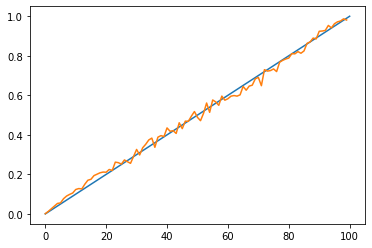

In [43]:
#dd = pd.DataFrame(preds_all.mean(1)[4], columns=all_ich)
dd = pd.DataFrame(preds_all.mean(0), columns=all_ich)

k=5
plt.plot([0,100],[0,1])
plt.plot(train_md[[all_ich[k]]].groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean().values)

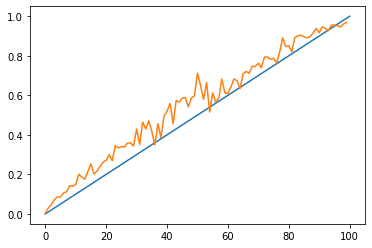

In [44]:
k = 0
dd = pd.DataFrame((preds_all.mean(0)), columns=all_ich)
vals = (train_md[all_ich[k]]*train_md['weights']).groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean()/ \
    train_md['weights'].groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean()

#dd = pd.DataFrame(preds_all.mean(1)[4], columns=all_ich)

plt.plot([0,100],[0,1])
plt.plot(vals.values)

In [45]:
res = np.zeros(6)
for k in range(6):
    res[k] = log_loss(train_md[all_ich[k]], preds_all.mean(0)[:,k], eps=1e-7, labels=[0,1], \
                      sample_weight=train_md.weights)
print((res*class_weights).mean())

0.06272000202860538


In [46]:
res = np.zeros(6)
for k in range(6):
    res[k] = log_loss(train_md[all_ich[k]], preds_all.mean(0)[:,k]**(0.9), eps=1e-7, labels=[0,1], \
                      sample_weight=train_md.weights)
print((res*class_weights).mean())

0.06210579573926969


In [71]:
%run ./Code.ipynb

In [47]:
stats_fn = PATH_DISK/'ensemble'/'stats.v{}'.format(VERSION)
if stats_fn.is_file():
    stats_fn.unlink()

In [52]:
stg = time.time()
for fold in range(3):
    for target in range(6):
        train_ensemble(train_md, preds_all, fold=fold, target=target, weighted=False)
print('total running time', time.time() - stg)

starting fold 0 target 0
my_len 5
obj  0.09293040160869917
obj  0.09291969827537482
obj  0.0929188132681645
obj  0.09291889175729623
obj  0.09291967659569389
obj  0.09292018145607456
obj  0.09292241733290181
obj  0.09293853551226271
obj  0.09301365453428778
obj  0.09298822553843933
obj  0.09292423573517658
obj  0.092919116995922
obj  0.09291879340506931
obj  0.09291878735773834
obj  0.09291878733211718
obj  0.09291878733196833
obj  0.09291878733193838
model [0.499  0.4994] sum 0.9984171696798796
my_len 5
v31 f0 t0: original ll 0.0945/0.1056, ensemble ll 0.0945/0.1055
running time 2.762725830078125
starting fold 0 target 1
my_len 5
obj  0.013657836545664964
obj  0.013637471832012147
obj  0.013643232051828817
obj  0.01363174901566939
obj  0.013638175675373128
obj  0.013652844309188207
obj  0.013638428382435163
obj  0.013640838034368826
obj  0.013612052527137928
obj  0.013579044699765709
obj  0.013568850903036256
obj  0.013560214293076696
obj  0.013560070124304945
obj  0.01356002967161133

obj  0.04069009202121951
obj  0.04069002229931145
obj  0.0406899859360425
obj  0.0406901053735642
obj  0.04069169217838435
obj  0.04069557408491732
obj  0.04069946493060607
obj  0.0407238756435288
obj  0.0406993900425892
obj  0.04071522511039056
obj  0.04065963455744143
obj  0.040648750355084744
obj  0.04064736029628788
obj  0.0406471913975738
obj  0.040647182404644634
obj  0.040647182318887816
model [0.3053 0.6936] sum 0.9988900353226938
my_len 5
v31 f2 t2: original ll 0.0368/0.0381, ensemble ll 0.0368/0.0382
running time 2.6036953926086426
starting fold 2 target 3
my_len 5
obj  0.023822845890254338
obj  0.02382245966224832
obj  0.02382246730659792
obj  0.023822561104599897
obj  0.023823518768736184
obj  0.02383024165977628
obj  0.02383850400548946
obj  0.023862260084401045
obj  0.023843900707470188
obj  0.023857123633851205
obj  0.023803698978329096
obj  0.023797129382447425
obj  0.023796120630458648
obj  0.02379596399070851
obj  0.023795950860207252
obj  0.023795950558784345
obj  0.

In [49]:
stg = time.time()
for fold in range(3):
    for target in range(6):
        train_ensemble(train_md, preds_all, fold=fold, target=target, weighted=True)
print('total running time', time.time() - stg)

starting fold 0 target 0
my_len 5
obj  0.10848751149280729
obj  0.10810099739911715
obj  0.10781535613291937
obj  0.10774559931748275
obj  0.10773228477359423
obj  0.10771827512303431
obj  0.10772291771283404
obj  0.10771488856590274
obj  0.10773827958783233
obj  0.10770802692469035
obj  0.10766561451935287
obj  0.10766317610125686
obj  0.10766277557915162
obj  0.10766277272270545
obj  0.1076627727178773
model [0.6433 0.3412] sum 0.9844261189711954
my_len 5
v31 f0 t0: original ll 0.0945/0.1056, ensemble ll 0.0951/0.1058
running time 2.5131471157073975
starting fold 0 target 1
my_len 5
obj  0.022215747915593526
obj  0.022180823844925455
obj  0.02218546904527962
obj  0.022260919949742435
obj  0.022205636329322494
obj  0.022223521498039803
obj  0.02220350257450385
obj  0.02220625521862886
obj  0.022157652781754557
obj  0.022108840505159502
obj  0.02209312501532477
obj  0.022085111043381976
obj  0.02208510993172032
obj  0.02208507632873788
model [0.2045 0.7955] sum 0.9999985879351192
my_le

obj  0.10705082233158733
obj  0.10705076097221962
obj  0.1070507608317187
obj  0.10705076082991886
obj  0.1070507608298993
model [0.4428 0.5502] sum 0.993045874914854
my_len 5
v31 f2 t0: original ll 0.0909/0.1080, ensemble ll 0.0909/0.1073
running time 2.4637980461120605
starting fold 2 target 1
my_len 5
obj  0.0206209960951316
obj  0.02057839675747976
obj  0.020575961895190568
obj  0.020662471184003595
obj  0.02060215389917553
obj  0.0206281416744154
obj  0.02059870784486831
obj  0.020603004822693765
obj  0.020528006312348676
obj  0.02044978721755355
obj  0.02041879822042835
obj  0.0204076401490834
obj  0.020407533665491088
obj  0.020407532276276317
obj  0.020407495478601118
model [0.1116 0.8884] sum 0.9999987342963872
my_len 5
v31 f2 t1: original ll 0.0146/0.0216, ensemble ll 0.0145/0.0215
running time 2.5032849311828613
starting fold 2 target 2
my_len 5
obj  0.04126236117735541
obj  0.04125130160538784
obj  0.041250519941495735
obj  0.04125199723949402
obj  0.041262742866394635
obj 

In [50]:
stats = pd.read_csv(PATH_DISK/'ensemble'/'stats.v{}'.format(VERSION))
stats.groupby(['weighted','target'])[['valid_loss','valid_loss_ens','valid_w_loss','valid_w_loss_ens']].mean()

valid_loss  valid_loss_ens  valid_w_loss  valid_w_loss_ens
weighted target                                                            
False    0         0.093450        0.093473      0.107523          0.107475
         1         0.014105        0.014022      0.020944          0.020804
         2         0.039410        0.039380      0.040225          0.040246
         3         0.023697        0.023662      0.020150          0.020179
         4         0.062458        0.062441      0.061901          0.062006
         5         0.077054        0.077014      0.080736          0.080748
True     0         0.093450        0.093868      0.107523          0.107323
         1         0.014105        0.014023      0.020944          0.020783
         2         0.039410        0.039488      0.040225          0.040245
         3         0.023697        0.023764      0.020150          0.020114
         4         0.062458        0.062518      0.061901          0.061868
         5         0.077054        0.077064      0.080736          0.080883

In [51]:
# non-weighted models
tt = pd.concat([
stats.loc[stats.weighted == False].groupby('target')[['valid_loss','valid_w_loss',
                                                      'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean(),
stats.loc[stats.weighted == True].groupby('target')[['valid_loss','valid_w_loss',
                                                     'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean()
],axis=1)
tt.columns = ['not weighted','weighted']
tt

,not weighted,weighted
valid_loss,0.057661,0.057661
valid_w_loss,0.062715,0.062715
valid_loss_ens,0.057638,0.057799
valid_w_loss_ens,0.062705,0.062648


In [40]:
# wegihted models
tt = pd.concat([
stats.loc[stats.weighted == False].groupby('target')[['valid_loss','valid_w_loss',
                                                      'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean(),
stats.loc[stats.weighted == True].groupby('target')[['valid_loss','valid_w_loss',
                                                     'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean()
],axis=1)
tt.columns = ['not weighted','weighted']
tt

,not weighted,weighted
valid_loss,0.057773,0.057773
valid_w_loss,0.061811,0.061811
valid_loss_ens,0.057676,0.058197
valid_w_loss_ens,0.062118,0.061454


In [53]:
np.set_printoptions(precision=4)
res2_all = []
for target in range(6):
    res2 = np.zeros((3, 2))
    for fold in range(3):
        model = pickle.load(open(PATH_DISK/'ensemble'/'model.f{}.t{}.v{}'
                                 .format(fold,target,VERSION),'rb'))
        res2[fold] = model.x
        #print(fold,target,model.x)
    print(target, res2.mean(0), res2.mean(0).sum())
    res2_all.append(res2)
print('total', np.stack(res2_all).mean((0,1)), np.stack(res2_all).mean((0,1)).sum())

0 [0.5409 0.4583] 0.9992314466952075
1 [0.1912 0.7955] 0.9866674949683405
2 [0.2966 0.7031] 0.999628496484607
3 [0.2603 0.7394] 0.9997162286512715
4 [0.2582 0.7395] 0.9977046751462421
5 [0.2966 0.7004] 0.9970134663733141
total [0.3073 0.6894] 0.9966603013864972


In [54]:
preds3 = np.stack([pickle.load(open(PATH_DISK/'preds_d{}_v{}'.format(ds, VERSION),'rb')) for ds in my_datasets3])
preds5 = np.stack([pickle.load(open(PATH_DISK/'preds_d{}_v{}'.format(ds, VERSION),'rb')) for ds in my_datasets5])

ValueError: all input arrays must have the same shape

In [58]:
[pickle.load(open(PATH_DISK/'preds_d{}_v{}'.format(ds, VERSION),'rb')).shape for ds in my_datasets3]

[(3, 8, 78545, 6), (3, 8, 78545, 6), (3, 8, 78545, 6)]

In [57]:
[pickle.load(open(PATH_DISK/'preds_d{}_v{}'.format(ds, VERSION),'rb')).shape for ds in my_datasets5]

[(5, 8, 78545, 6), (5, 8, 78545, 6), (5, 32, 78545, 6)]

In [ ]:
preds = np.concatenate([preds3.mean((1,2)), preds5.mean((1,2))],axis=0)

In [ ]:
yuval_test = pickle.load(open(PATH_DISK/'ensemble/ensemble_test_image_ids.pkl','rb'))
assert len(yuval_test) == len(test_md)

df = pd.DataFrame(np.arange(len(yuval_test)), columns=['yuval_idx'])
df.index = yuval_test
test_md = test_md.join(df, on = 'img_id')

In [ ]:
names_y3 = [
    #'model_Densenet201_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_{}.pkl',
    'model_Densenet161_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_Densenet169_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnext101_32x4d_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnet101_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
           ]

In [ ]:
names_y5 = [
    'model_se_resnext101_32x4d_version_new_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnet101_version_new_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnet101_version_new_splits_focal_fullhead_resmodel_pool2_over3_type_test_pred_ensamble_split_{}.pkl',
           ]

In [55]:
preds_y3 = np.stack([torch.sigmoid(torch.stack([torch.stack(pickle.load(
    open(PATH_DISK/'yuval/OOF'/name.format(fold),'rb'))) for fold in range(3)])).numpy() for name in names_y3])

NameError: name 'names_y3' is not defined

In [56]:
preds_y5 = np.stack([torch.sigmoid(torch.stack([torch.stack(pickle.load(
    open(PATH_DISK/'yuval/OOF'/name.format(fold),'rb'))) for fold in range(5)])).numpy() for name in names_y5])

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 134734 and 131494 in dimension 2 at /opt/conda/conda-bld/pytorch_1565272271120/work/aten/src/TH/generic/THTensor.cpp:689

In [ ]:
preds_y = np.concatenate([preds_y3.mean((1,2)), preds_y5.mean((1,2))],axis=0)

In [52]:
preds_y = preds_y[:,test_md.yuval_idx]
preds_y = preds_y[:,:,np.array([5,0,1,2,3,4])]

In [53]:
preds = np.concatenate([preds, preds_y], axis=0)

In [ ]:
preds = preds[ds_mask]

In [54]:
preds.shape

(13, 78545, 6)

In [55]:
preds = predBounding(preds)

any too low inconsistencies
1 class: 0.00048477844645646544
2 class: 0.016350254875940787
3 class: 0.008251027093728729
4 class: 0.017832012026422872
5 class: 0.04721644133446285
total 0.08447190978224144
any too high inconsistencies
total 0.22642874981025085


In [105]:
#predictions = preds.mean((0,1))

In [56]:
stg = time.time()

test_preds_trgt = []
print('version', VERSION)
for target in range(6):
    
    my_len = len(my_datasets3) + len(my_datasets5)
    X = np.stack([preds[:my_len,:,target].mean(0), 
                  preds[my_len:,:,target].mean(0)], axis=0)
    
    model = pickle.load(open(PATH_DISK/'ensemble'/'model.f{}.t{}.v{}'.format(fold,target,VERSION),'rb'))
    test_preds_trgt.append((X*np.expand_dims(model.x, axis=1)).sum(0))

predictions = np.stack(test_preds_trgt,axis=1)

print('total running time', time.time() - stg)

version 32
total running time 0.03508424758911133


In [57]:
np.corrcoef(preds[:,:,0])

array([[1.    , 0.992 , 0.992 , 0.9932, 0.993 , 0.9929, 0.9955, 0.9927,
        0.9892, 0.9906, 0.9916, 0.9915, 0.9913],
       [0.992 , 1.    , 0.9945, 0.9968, 0.995 , 0.9951, 0.9901, 0.9903,
        0.9959, 0.9924, 0.9949, 0.9931, 0.9932],
       [0.992 , 0.9945, 1.    , 0.9955, 0.9967, 0.9968, 0.9897, 0.9902,
        0.9914, 0.9965, 0.9934, 0.9945, 0.9946],
       [0.9932, 0.9968, 0.9955, 1.    , 0.9967, 0.9966, 0.9906, 0.9915,
        0.9932, 0.9929, 0.9968, 0.9941, 0.9939],
       [0.993 , 0.995 , 0.9967, 0.9967, 1.    , 0.9986, 0.9899, 0.9909,
        0.9909, 0.9936, 0.9936, 0.996 , 0.9954],
       [0.9929, 0.9951, 0.9968, 0.9966, 0.9986, 1.    , 0.99  , 0.9908,
        0.9911, 0.9938, 0.9937, 0.9955, 0.9963],
       [0.9955, 0.9901, 0.9897, 0.9906, 0.9899, 0.99  , 1.    , 0.995 ,
        0.9922, 0.9927, 0.9936, 0.9934, 0.9931],
       [0.9927, 0.9903, 0.9902, 0.9915, 0.9909, 0.9908, 0.995 , 1.    ,
        0.9915, 0.9923, 0.9936, 0.9937, 0.9935],
       [0.9892, 0.9959, 0.9914, 

In [110]:
predictions.shape

(78545, 6)

# Submitting

In [58]:
id_column = np.array([a + '_' + b for a in test_md.SOPInstanceUID for b in all_ich])
sub = pd.DataFrame({'ID': id_column, 'Label': predictions.reshape(-1)})
sub.to_csv(PATH/'sub.csv', index=False)

## Sanity checks

In [59]:
test_md['pred_any'] = predictions[:,0]

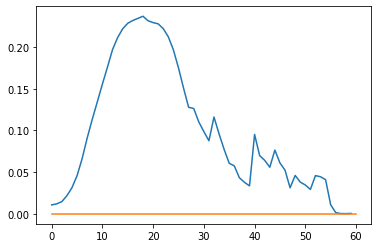

In [60]:
plt.plot(test_md[['pos_idx','pred_any']].groupby('pos_idx').mean())
plt.plot([0,60],[0,0])

In [61]:
# weighted models + weighted ensembling
#0 [2.14e-04 2.50e-04 3.15e-04 2.15e-03 9.88e-01 9.93e-01 9.94e-01]
#1 [4.46e-06 5.32e-06 6.88e-06 8.58e-05 1.34e-01 6.16e-01 9.24e-01]
#2 [4.88e-05 5.54e-05 6.88e-05 3.27e-04 9.65e-01 9.86e-01 9.90e-01]
#3 [1.78e-05 2.00e-05 2.42e-05 1.04e-04 9.52e-01 9.77e-01 9.81e-01]
#4 [6.56e-05 7.67e-05 9.50e-05 4.71e-04 9.41e-01 9.85e-01 9.89e-01]
#5 [9.93e-05 1.21e-04 1.53e-04 9.91e-04 9.42e-01 9.86e-01 9.92e-01]

# weighted models + non-weighted ensembling
#0 [9.25e-05 1.11e-04 1.41e-04 1.60e-03 9.93e-01 9.97e-01 9.99e-01]
#1 [8.16e-06 9.69e-06 1.24e-05 9.28e-05 1.31e-01 5.91e-01 8.94e-01]
#2 [2.38e-05 2.66e-05 3.46e-05 2.46e-04 9.73e-01 9.91e-01 9.94e-01]
#3 [1.25e-05 1.40e-05 1.71e-05 8.06e-05 9.66e-01 9.90e-01 9.94e-01]
#4 [3.27e-05 3.80e-05 4.71e-05 3.55e-04 9.51e-01 9.91e-01 9.94e-01]
#5 [4.51e-05 5.74e-05 7.40e-05 7.90e-04 9.46e-01 9.89e-01 9.94e-01]

np.set_printoptions(precision=2)
for k in range(6):
    print(k,np.quantile(predictions[:,k],[0.0001,0.001,0.01,0.5,0.99,0.999,0.9999]))

0 [2.27e-04 2.61e-04 3.20e-04 2.23e-03 9.88e-01 9.93e-01 9.94e-01]
1 [3.07e-06 3.69e-06 4.66e-06 8.41e-05 1.37e-01 6.15e-01 9.25e-01]
2 [5.00e-05 5.49e-05 6.77e-05 3.26e-04 9.65e-01 9.85e-01 9.89e-01]
3 [2.01e-05 2.21e-05 2.70e-05 1.10e-04 9.53e-01 9.80e-01 9.84e-01]
4 [7.19e-05 8.40e-05 1.03e-04 4.92e-04 9.41e-01 9.85e-01 9.89e-01]
5 [1.07e-04 1.28e-04 1.59e-04 1.02e-03 9.41e-01 9.85e-01 9.92e-01]


In [62]:
# weighted models + weighted ensembling
#array([0.1361, 0.0056, 0.0429, 0.0295, 0.0468, 0.0569])

# weighted models + non-weighted ensembling
#array([0.1335, 0.0055, 0.0423, 0.0298, 0.0466, 0.0556])

np.set_printoptions(precision=4)
predictions.mean(0)

array([0.1364, 0.0056, 0.0429, 0.0296, 0.047 , 0.057 ])

In [63]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13636614580400758

In [93]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13418304425483424

In [64]:
sub = sub.sort_values('ID').reset_index(drop=True)
best_sub = pd.read_csv(PATH/'submission56.csv').sort_values('ID').reset_index(drop=True)

In [65]:
best_sub.loc[range(0,len(sub),6), 'Label'].mean()

0.1332598999809263

In [66]:
sp.stats.spearmanr(sub.loc[range(0,len(sub),6), 'Label'], 
                   best_sub.loc[range(0,len(sub),6), 'Label'])

SpearmanrResult(correlation=0.9851517460097732, pvalue=0.0)

In [124]:
sp.stats.spearmanr(sub.loc[range(0,len(sub),6), 'Label'], 
                   best_sub.loc[range(0,len(sub),6), 'Label'])

SpearmanrResult(correlation=0.985530472858697, pvalue=0.0)

In [67]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9985801915293375

In [126]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9986350935991319

## Submission

In [68]:
!~/.local/bin/kaggle competitions submit rsna-intracranial-hemorrhage-detection -f ~/sub.csv -m "GCP, my weighted + yuval + 2xfocal, 32TTA, ensembling weighted"

100%|██████████████████████████████████████| 20.8M/20.8M [00:04<00:00, 4.82MB/s]
Successfully submitted to RSNA Intracranial Hemorrhage Detection

In [ ]:
!kaggle competitions submit rsna-intracranial-hemorrhage-detection -f C:/StudioProjects/Hemorrhage/sub.csv -m "GCP, d161+d169+d201+s101+yd161, 8TTA, ensemble, bounds"